In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
import requests
import os, glob
from bs4 import BeautifulSoup
import urllib
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import Select
import unittest, time, re
from sklearn.linear_model import LinearRegression
import array as arr
import scipy.stats as st
import math
import matplotlib.gridspec as gridspec
import random
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import datetime

In [2]:
filesloc_new='data path'
raw = pd.read_csv(filesloc_new,sep =";")

In [3]:
for t in raw.index:
    if raw.loc[t,'Time']=='2019-10-19T08:51:00+08:00':
        print(t)

38204


### 產出檔案的副函式
* 功能：將檔案輸出成csv檔
* Result 是檔案路徑，請依據自身電腦設定

In [5]:
def OutputCSV(SAMPLE_List,filename):   
    Result ='data path'+filename+'.csv'
    df_SAMPLE = pd.DataFrame.from_dict(SAMPLE_List)
    df_SAMPLE.to_csv( Result  , index=False ) 
    print( '成功產出'+Result )

## 時區變換，日期切分
* 將gravana網站上的資料進行分析，多出[DATETME] [date] [timearea]三個欄位進行紀錄 
* 將台灣時區 [+08:00] 替換成越南的 [+07:00]

In [14]:
def timeprocess(raw):
    #變更時區
    
    #時間標記切分
#     split_temp=raw['Time'].Series.str.split('+',expand=True)
#     new=pd.DataFrame({'DATETIME':[0],'date':[0],'time':[0],'timearea':[0]},index=[1])
#     new
#     raw=raw.append(new)
    raw.loc[:,'DATETIME'] = 0
    raw.loc[:,'date'] = 0
    raw.loc[:,'time'] = 0 
    raw.loc[:,'timearea'] = 0
    for i in raw.index:
        raw.loc[i,'DATETIME']=raw.loc[i,'Time'].split('+', 1)[0]
        raw.loc[i,'date']=raw.loc[i,'Time'].split('+', 1)[0].split('T', 1)[0]
        raw.loc[i,'time']=raw.loc[i,'Time'].split('+', 1)[0].split('T', 1)[1]
        raw.loc[i,'timearea']='+07:00'
    for k in raw['DATETIME'].index:
        raw.loc[k,'DATETIME']=raw.loc[k,'DATETIME'].replace("T", " ")
#         k=k.replace("T", " ")
        
    
#     raw = pd.DataFrame(raw.Time.str.split('+',1).tolist(),
#                                  columns = ['datetime','timearea'])
    
    
    return raw

In [7]:
raw_temp_steady=timeprocess(raw.loc[38186:68186,:])

C:\Users\user\Anaconda2\envs\for_python_3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\Anaconda2\envs\for_python_3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
raw_temp_steady

Time  Temp1(Pre-baking Zone)  \
38186  2019-10-19T08:33:00+08:00                    34.7   
38187  2019-10-19T08:34:00+08:00                    34.8   
38188  2019-10-19T08:35:00+08:00                    34.7   
38189  2019-10-19T08:36:00+08:00                    35.1   
38190  2019-10-19T08:37:00+08:00                    37.2   
38191  2019-10-19T08:38:00+08:00                    41.5   
38192  2019-10-19T08:39:00+08:00                    46.8   
38193  2019-10-19T08:40:00+08:00                    52.4   
38194  2019-10-19T08:41:00+08:00                    58.0   
38195  2019-10-19T08:42:00+08:00                    63.4   
38196  2019-10-19T08:43:00+08:00                    68.7   
38197  2019-10-19T08:44:00+08:00                    73.7   
38198  2019-10-19T08:45:00+08:00                    78.5   
38199  2019-10-19T08:46:00+08:00                    82.9   
38200  2019-10-19T08:47:00+08:00                    86.9   
38201  2019-10-19T08:48:00+08:00                    90.9   
38202  2019-10-19T08:49:00+08:00                    94.6   
38203  2019-10-19T08:50:00+08:00                    98.1   
38204  2019-10-19T08:51:00+08:00                   101.3   
38205  2019-10-19T08:52:00+08:00                   103.6   
38206  2019-10-19T08:53:00+08:00                   104.7   
38207  2019-10-19T08:54:00+08:00                   104.3   
38208  2019-10-19T08:55:00+08:00                   103.0   
38209  2019-10-19T08:56:00+08:00                   101.4   
38210  2019-10-19T08:57:00+08:00                    99.8   
38211  2019-10-19T08:58:00+08:00                    99.1   
38212  2019-10-19T08:59:00+08:00                    99.1   
38213  2019-10-19T09:00:00+08:00                    99.7   
38214  2019-10-19T09:01:00+08:00                   100.7   
38215  2019-10-19T09:02:00+08:00                   101.8   
...                          ...                     ...   
68157  2019-12-17T17:46:00+08:00                   102.6   
68158  2019-12-17T17:47:00+08:00                   102.7   
68159  2019-12-17T17:48:00+08:00                   102.8   
68160  2019-12-17T17:49:00+08:00                   102.8   
68161  2019-12-17T17:50:00+08:00                   102.9   
68162  2019-12-17T17:51:00+08:00                   102.9   
68163  2019-12-17T17:52:00+08:00                   102.9   
68164  2019-12-17T17:53:00+08:00                   102.9   
68165  2019-12-17T17:54:00+08:00                   102.9   
68166  2019-12-17T17:55:00+08:00                   102.9   
68167  2019-12-17T17:56:00+08:00                   103.0   
68168  2019-12-17T17:57:00+08:00                   102.9   
68169  2019-12-17T17:58:00+08:00                   102.9   
68170  2019-12-17T17:59:00+08:00                   102.9   
68171  2019-12-17T18:00:00+08:00                   102.8   
68172  2019-12-17T18:01:00+08:00                   102.9   
68173  2019-12-17T18:02:00+08:00                   102.9   
68174  2019-12-17T18:03:00+08:00                   103.0   
68175  2019-12-17T18:04:00+08:00                   103.0   
68176  2019-12-17T18:05:00+08:00                   103.0   
68177  2019-12-17T18:06:00+08:00                   103.1   
68178  2019-12-17T18:07:00+08:00                   103.0   
68179  2019-12-17T18:08:00+08:00                   103.0   
68180  2019-12-17T18:09:00+08:00                   103.0   
68181  2019-12-17T18:10:00+08:00                   103.1   
68182  2019-12-17T18:11:00+08:00                   103.0   
68183  2019-12-17T18:12:00+08:00                   103.0   
68184  2019-12-17T18:13:00+08:00                   103.0   
68185  2019-12-17T18:14:00+08:00                   102.2   
68186  2019-12-17T18:15:00+08:00                   100.8   

       Temp2(Gelling Zone I)  Temp3(Gelling Zone II)  Temp4(Gelling Zone III)  \
38186                   35.7                    37.0                     37.2   
38187                   35.7                    37.0                     37.2   
38188                   35.6                    37.0            

## 人工資料清洗
#### 利用目視法先將特定日期與特定爐次中data drop掉
* (1) taglist是將每日溫升段會智成曲線圖之後，以肉眼篩選的方式，將"不正常的溫升段做上標記"的標記日期與加熱區域紀錄檔
* (2) 將以taglist作為日期標記，對每一天進行資料篩選

In [10]:
taglist='taglist data path'
tag_list = pd.read_csv(taglist,sep =",")
tag_list=pd.DataFrame(tag_list)

In [11]:
def datadrop(raw_ctch_rise):
    for zonenum in raw.columns[1:9]:        
        print(zonenum,'replacement start')
        replacelist=[]
        for k in tag_list.index:
            if tag_list.loc[k,zonenum]=='x':
                replacelist=np.append(replacelist,tag_list.loc[k,'date'])
        print('replace list of',zonenum,'=',replacelist)
        print('length =',len(replacelist))
        for date in replacelist:
            for i in raw_ctch_rise.index:
                try:
            #         print('for judge day=',raw_ctch_rise.loc[i,'date'],'for replaced date =',date)
                    date_relst=datetime.datetime.strptime(date, "%Y-%m-%d")
                    date_indf=datetime.datetime.strptime(raw_ctch_rise.loc[i,'date'], "%Y-%m-%d")
                    if date_indf==date_relst:
            #             print(i,'date= ',raw_ctch_rise.loc[i,'date'])
                        raw_ctch_rise.loc[i,zonenum]=np.nan
            #             print('replace= ',raw_ctch_rise.loc[i,'Temp1(Pre-baking Zone)'])
                    elif date_indf>date_relst:
                        break
                    elif date_indf<date_relst:
                        continue
                except TypeError:
                    print('block= NaN')
                    pass
            print('date',date,'has been replaced')
            try:
                if date_relst>datetime.datetime.strptime(raw_ctch_rise.loc[raw_ctch_rise[zonenum].tail(1).index[0],'date'], "%Y-%m-%d"):
                    print('replace done')
                    break
            except TypeError:
#                 print('block= NaN')
                pass
        print(zonenum,'replacement in done')
    return raw_ctch_rise


In [12]:
raw_temp_steady_drop=datadrop(raw_temp_steady)

('Temp1(Pre-baking Zone)', 'replacement start')
('replace list of', 'Temp1(Pre-baking Zone)', '=', array(['2019-07-25', '2019-08-14', '2019-09-12', '2019-09-15',
       '2019-09-21', '2019-10-22', '2019-10-27', '2019-11-01',
       '2019-11-08', '2019-12-29', '2019-12-30', '2020-01-13',
       '2020-01-17', '2020-01-21', '2020-02-05', '2020-02-07',
       '2020-02-12', '2020-02-13', '2020-03-24', '2020-04-07',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-30',
       '2020-05-04', '2020-05-23', '2020-05-26', '2020-05-29',
       '2020-06-29', '2020-07-24'], dtype='|S32'))
('length =', 30)
('date', '2019-07-25', 'has been replaced')
('date', '2019-08-14', 'has been replaced')
('date', '2019-09-12', 'has been replaced')
('date', '2019-09-15', 'has been replaced')
('date', '2019-09-21', 'has been replaced')
('date', '2019-10-22', 'has been replaced')
('date', '2019-10-27', 'has been replaced')
('date', '2019-11-01', 'has been replaced')
('date', '2019-11-08', 'has been replace

In [119]:
OutputCSV(raw_temp_steady_drop,'mm')

成功產出C:/Users/user/Documents/roadtobecomecodingmaster/TECO_learning/Vietnam/mm.csv


### 生成一次差分資料

In [15]:
raw_temp_steady_drop_diff=raw_temp_steady_drop[raw_temp_steady_drop.columns[1:9]].diff()

In [16]:
#取穩定段dataframe生成 -> 進行繪圖&疊圖 -> label部分
#一次差分 -> 用一次差分的index數選取steady資料 ->
for col in raw_temp_steady_drop.columns[10:14]:
    print(len(raw_temp_steady_drop_diff),len(raw_temp_steady_drop[col]))
    raw_temp_steady_drop_diff[col]=0
    for i in raw_temp_steady_drop_diff.index:
        raw_temp_steady_drop_diff.loc[i,col]=raw_temp_steady_drop.loc[i,col]
raw_temp_steady_drop_diff=raw_temp_steady_drop_diff.replace(np.nan, 0)

(30001, 30001)
(30001, 30001)
(30001, 30001)
(30001, 30001)


### 紀錄有資料的日期
* datelst為進行完人工資料清洗後，存取資料正常日期的list

In [17]:
datelst=[]
for i in raw_temp_steady_drop_diff.index[:-1]:
    if raw_temp_steady_drop_diff.loc[i,'date']!=raw_temp_steady_drop_diff.loc[i+1,'date']:
        datelst=np.append(datelst,raw_temp_steady_drop_diff.loc[i,'date'])
datelst

array(['2019-10-19', '2019-10-22', '2019-10-23', '2019-10-24',
       '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
       '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
       '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
       '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
       '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
       '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
       '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
       '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
       '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
       '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
       '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-10',
       '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-15',
       '2019-12-16'], dtype='|S32')

# total 溫升dataframe生成
* df_total為溫升段資料存取的dataframe

In [2]:
df_total=pd.DataFrame({})
for date in datelst:
    df=pd.DataFrame({})
    for zonenum in raw_temp_steady_drop.columns[1:9]:
        tr_lst=[]
        tr_lst_diff=[]
        for i in raw_temp_steady_drop_diff.index:
            if raw_temp_steady_drop_diff.loc[i,'date']==date and raw_temp_steady_drop_diff.loc[i,zonenum]>0.5:
                #拆成temp_rise還有平穩段
                if raw_temp_steady_drop_diff.loc[i,zonenum]>0.5:
                    tr_lst=np.append(tr_lst,raw_temp_steady_drop.loc[i,zonenum])
                    tr_lst_diff=np.append(tr_lst_diff,raw_temp_steady_drop_diff.loc[i,zonenum])
                    if raw_temp_steady_drop.loc[i,zonenum]>100 and zonenum =='Temp1(Pre-baking Zone)':
                        break
                    elif raw_temp_steady_drop.loc[i,zonenum]>140:
                        break
        df1=pd.DataFrame({zonenum:tr_lst,zonenum+'_diff':tr_lst_diff})
        df=pd.concat([df,df1],axis=1)
    df_date=pd.DataFrame({'date':[date]*(len(df))})
    df=pd.concat([df,df_date],axis=1)
    df_total=df_total.append(df, ignore_index=True)


NameError: name 'pd' is not defined

In [556]:
OutputCSV(df_total,'df_totalss')

成功產出C:/Users/user/Documents/roadtobecomecodingmaster/TECO_learning/Vietnam/df_totalss.csv


### 溫升段畫圖
##### (1) 按日期逐日匯出溫升段

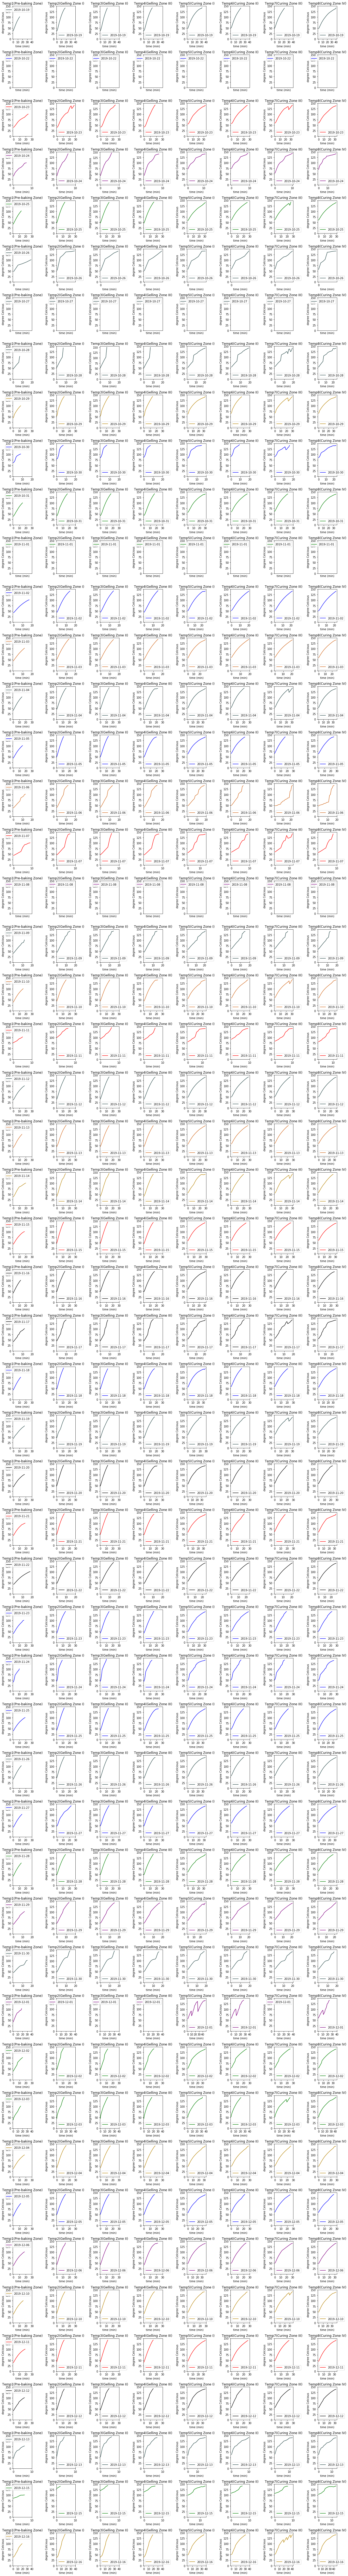

In [20]:
y=[]
colorlist=['r','b','g','black','darkgoldenrod','darkslategray','purple','chocolate']
fig=plt.figure(figsize=(18,2.5*len(datelst)))
for k,date in enumerate(datelst):
    color =colorlist[random.sample(range(8), k=1)[0]]
#     fig.suptitle(date,fontsize=15)
    for i,zonenum in enumerate(raw_temp_steady_drop.columns[1:9]):
        for d in df_total.index:
            if df_total.loc[d,'date']==date:
                y=np.append(y,df_total.loc[d,zonenum])
        ax=fig.add_subplot(len(datelst),8,8*k+i+1)
#         print(len(datelst),8,8*k+i+1)
        ax.plot(y,'-',color = color, label="temperature_rise_detail_cleaned")
        ax.set_title(zonenum)
        ax.set_xlabel('time (min)')
        ax.set_ylabel('degree Celcious')
        ax.set_xticks(np.arange(0, len(y), 10))
        ax.set_yticks(np.arange(0, 170, 25))
        ax.legend([date])
        y=[]
    fig.tight_layout()

##### (2) 進行疊圖
* 將每一天的溫升段，所有加熱區域畫在同一張圖
* 若當天無資料將印出'"當天日期" has no data'


('2019-10-22', 'has no data')
('2019-10-27', 'has no data')
('2019-11-01', 'has no data')
('2019-11-08', 'has no data')


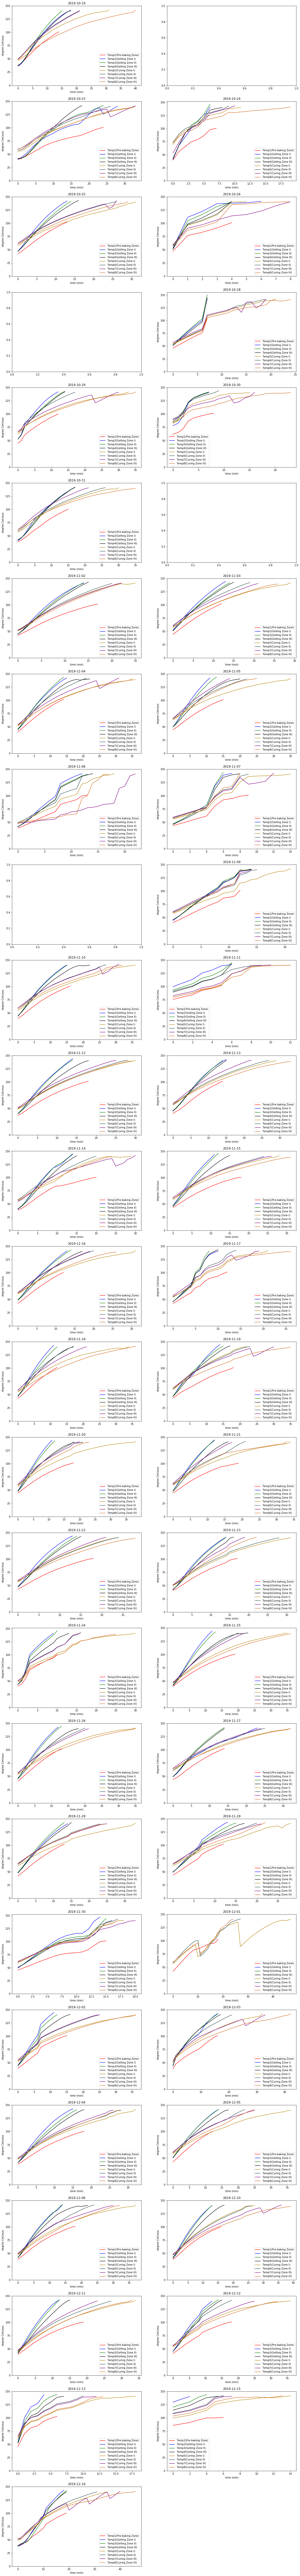

In [24]:
fig=plt.figure(figsize=(20,7*len(datelst)/2))
for dk,date in enumerate(datelst):
#塞日期框
    ax=fig.add_subplot(len(datelst)/2+1,2,dk+1)
    colorlist=['r','b','g','black','darkgoldenrod','darkslategray','purple','chocolate']
    if (date in df_total.values)==True:
        for h,zonenum in enumerate(raw_temp_steady_drop.columns[1:9]):
            indexlist=[]
            y=[]
            for i in df_total.index:
                if df_total.loc[i,'date']==date:
                    indexlist=np.append(indexlist,i)
            y=df_total.loc[indexlist[0]:indexlist[0]+len(indexlist)-1,zonenum]
            y.index=range(y.index[0]-y.index[0],y.index[-1]-y.index[0]+1,1)
#             print(indexlist)
#             print([y])
            ax.plot(y,'-',color=colorlist[h],label=zonenum)
        #塞八個爐
        ax.set_title(date)
        ax.set_xlabel('time (min)')
        ax.set_ylabel('degree Celcious')
        ax.set_xlabel('time (min)')
        ax.set_yticks(np.arange(0, 170, 25))
        ax.legend()
    else:
        print(date,'has no data')
        continue
    

### 溫升段資料特徵抓取
* 藉由觀察疊圖後的結果發現，溫升曲線的歷經時間有差別，且大致分為平穩上升還有上下波動，因此下方程式碼將抓取下面兩個數據：
* 1. 為取溫升速度，擷取Max, Min 和 rising time 作為溫度差和溫升時間的存取欄位
* 2. datelist為紀錄資料中日期變化的row數，以便進行資料抓取

In [25]:
#抓取特徵類別：持續時間，溫度差，最高溫度，溫升中溫度數值分布(各百分比的值)，平滑程度
#日期迴圈中存取資料
#用INDEX位置差抓持續時間，暫存LIST中求最高溫度，用一次差分的值判斷下折次數
#包日期 (上下) df_all
#包爐次 (左右) df_daily
#先抓好_df_total 中的位置
datelist=[0]
for i,date in enumerate(df_total['date']):
    try:
        if df_total.loc[i+1,'date']!=df_total.loc[i,'date']:
            datelist=np.append(datelist,[i,i+1])
            print(i,date,i+1,df_total.loc[i+1,'date'])
    except KeyError:
        print('data tail')
datelist=np.append(datelist,df_total.index[-1])
print('==================')
#包爐次
df_all=pd.DataFrame({})
for k in range(0,len(datelist),2):
#日期
# k=0
    df_daily=pd.DataFrame({})
    if datelist[k]==datelist[k+1]:
        pass 
    else:
        #爐次
        for col in range(0,len(df_total.columns[:-1]),2):
            df=pd.DataFrame({})
            templist=[]
            templist_diff=[]
#             print(k,datelist[k],k+1,datelist[k+1])
            for j,temp in enumerate(df_total.loc[datelist[k]:datelist[k+1],df_total.columns[col]]):
#                 print(j,temp)
                if (pd.isnull(temp)==True and j!=0) or j==len(df_total.loc[datelist[k]:datelist[k+1],df_total.columns[col]])-1:
                    df.loc[0,df_total.columns[col][:5]+' Max']=templist.max()
                    df.loc[0,df_total.columns[col][:5]+' min']=templist.min()
                    df.loc[0,df_total.columns[col][:5]+' temperature difference']=templist.max()-templist.min()
                    df.loc[0,df_total.columns[col][:5]+' rising time']=str(len(templist))
                    df.loc[0,df_total.columns[col][:5]+' std']=np.std(templist_diff, ddof=1)
                    print(df_total.columns[col],df_total.loc[datelist[k],'date'],templist)
        #             print(df_total.loc[len(templist),'date'])
        #             df.index=[df_total.loc[len(templist),'date']]
                    #放日期
                    break
                elif pd.isnull(temp)==True and j==0:
                    break
                else:
                    templist=np.append(templist,temp)
                    templist_diff=np.append(templist_diff,df_total.loc[j,df_total.columns[col+1]])
            df_daily=pd.concat([df_daily, df],ignore_index=False,axis=1)
        df_daily.index=[df_total.loc[datelist[k],'date']]
    df_all=df_all.append(df_daily)

(40, '2019-10-19', 41, '2019-10-23')
(74, '2019-10-23', 75, '2019-10-24')
(94, '2019-10-24', 95, '2019-10-25')
(126, '2019-10-25', 127, '2019-10-26')
(135, '2019-10-26', 136, '2019-10-28')
(160, '2019-10-28', 161, '2019-10-29')
(196, '2019-10-29', 197, '2019-10-30')
(220, '2019-10-30', 221, '2019-10-31')
(256, '2019-10-31', 257, '2019-11-02')
(282, '2019-11-02', 283, '2019-11-03')
(312, '2019-11-03', 313, '2019-11-04')
(349, '2019-11-04', 350, '2019-11-05')
(385, '2019-11-05', 386, '2019-11-06')
(408, '2019-11-06', 409, '2019-11-07')
(423, '2019-11-07', 424, '2019-11-09')
(445, '2019-11-09', 446, '2019-11-10')
(482, '2019-11-10', 483, '2019-11-11')
(495, '2019-11-11', 496, '2019-11-12')
(526, '2019-11-12', 527, '2019-11-13')
(560, '2019-11-13', 561, '2019-11-14')
(591, '2019-11-14', 592, '2019-11-15')
(623, '2019-11-15', 624, '2019-11-16')
(655, '2019-11-16', 656, '2019-11-17')
(682, '2019-11-17', 683, '2019-11-18')
(719, '2019-11-18', 720, '2019-11-19')
(755, '2019-11-19', 756, '2019-

('Temp4(Gelling Zone III)', '2019-10-26', array([ 51. ,  98.7, 110.3, 125. , 140.8]))
('Temp5(Curing Zone I)', '2019-10-26', array([ 57.6,  96. , 104.5, 115.7, 140. , 140.5]))
('Temp6(Curing Zone II)', '2019-10-26', array([ 58.3,  97.4, 106. , 117.4, 141. ]))
('Temp7(Curing Zone III)', '2019-10-26', array([ 59.2,  90.7,  97.3, 106.2, 113.9, 116.4, 123. , 132.8]))
('Temp8(Curing Zone IV)', '2019-10-26', array([ 57. ,  86.9,  93.5, 102.4, 135.1, 136.3, 138.7, 139.9]))
('Temp1(Pre-baking Zone)', '2019-10-28', array([ 46. ,  51.3,  56.4,  61.8,  66.8,  71.6,  76.2, 103.9]))
('Temp2(Gelling Zone I)', '2019-10-28', array([ 52.5,  60.9,  69.5,  77.9,  85.8,  93.3, 100.1, 142.4]))
('Temp3(Gelling Zone II)', '2019-10-28', array([ 52.9,  61.6,  70.7,  79.3,  87.9,  96. , 103.6, 150.3]))
('Temp4(Gelling Zone III)', '2019-10-28', array([ 51. ,  59.2,  67.2,  75.1,  82.7,  90.1,  97.1, 144.5]))
('Temp5(Curing Zone I)', '2019-10-28', array([ 53.2,  58.1,  62.9,  67.5,  72.1,  76.3,  80.2, 108.8, 111

('Temp1(Pre-baking Zone)', '2019-11-04', array([ 40.5,  45.5,  50.9,  56.3,  61.6,  66.7,  71.5,  76.1,  80.5,
        84.5,  88.7,  92.5,  95.8,  99.2, 101.9]))
('Temp2(Gelling Zone I)', '2019-11-04', array([ 45.3,  53.2,  62.1,  70.9,  79.1,  87. ,  94.4, 101. , 107.4,
       113.5, 119.5, 125.1, 130. , 134.7, 139.1, 142.1]))
('Temp3(Gelling Zone II)', '2019-11-04', array([ 45.8,  53.6,  62.2,  71. ,  79.4,  87.6,  95.3, 102.6, 109.6,
       116.2, 122.4, 128.2, 133.8, 138.9, 143.6]))
('Temp4(Gelling Zone III)', '2019-11-04', array([ 44.9,  51.4,  58.9,  66.3,  73.6,  80.5,  87.1,  93.4,  99.4,
       105.2, 110.6, 115.8, 120.9, 125.5, 129.5, 133.4, 136. , 138.2,
       139.3, 138.1, 139. , 139.7, 140.3]))
('Temp5(Curing Zone I)', '2019-11-04', array([ 51.5,  56.2,  61.2,  66.1,  71. ,  75.3,  79.4,  83.4,  87.1,
        90.6,  94. ,  97.1, 100.2, 103. , 105.6, 108.2, 110.6, 112.7,
       114.9, 117. , 119.2, 121. , 122.7, 124.3, 125.7, 127. , 128.4,
       129.6, 130.9, 132.1, 133.3

('Temp1(Pre-baking Zone)', '2019-11-11', array([ 75.7,  80.4,  84.7,  93. ,  96.7, 102.2]))
('Temp2(Gelling Zone I)', '2019-11-11', array([ 99.8, 106.8, 113.6, 125.7, 131.2, 139.4, 141.3]))
('Temp3(Gelling Zone II)', '2019-11-11', array([ 93.4,  99.5, 105.4, 116. , 121. , 130.2, 144.9]))
('Temp4(Gelling Zone III)', '2019-11-11', array([ 89.6,  95. , 100.2, 109.6, 114. , 122.3, 143.3]))
('Temp5(Curing Zone I)', '2019-11-11', array([ 80.3,  84.1,  87.8,  94.3,  97.2, 103. , 123.8, 129.2, 137.7,
       138.5, 139.5, 140. ]))
('Temp6(Curing Zone II)', '2019-11-11', array([ 91.6,  96.7, 101.5, 110.4, 114.5, 121.9, 132.1, 136.2, 139.4,
       140.4]))
('Temp7(Curing Zone III)', '2019-11-11', array([ 82.9,  86.9,  90.8,  98. , 101.2, 107.9, 124. , 129.7, 139.1,
       139.8, 140.8]))
('Temp8(Curing Zone IV)', '2019-11-11', array([ 80. ,  84.1,  88. ,  95.3,  98.7, 104.9, 117.5, 121.5, 136.6,
       138.5, 139.3, 140. ]))
('Temp1(Pre-baking Zone)', '2019-11-12', array([ 37. ,  41. ,  46. ,  51

('Temp1(Pre-baking Zone)', '2019-11-17', array([ 42.3,  47.1,  52.5,  57.9,  62.5,  72.1,  75.3,  83.9,  89.1,
        91.6,  93.9,  98.1, 101.4]))
('Temp2(Gelling Zone I)', '2019-11-17', array([ 45.4,  53.1,  61.6,  70.5,  77.5,  98.6, 105.8, 123.8, 133.8,
       138. , 141.2]))
('Temp3(Gelling Zone II)', '2019-11-17', array([ 45.9,  52.7,  60.6,  68.6,  76.5, 101.5, 109.2, 129.5, 141.1]))
('Temp4(Gelling Zone III)', '2019-11-17', array([ 45.8,  52.3,  59.4,  66.8,  74.8,  98.5, 105.2, 124.1, 135.1,
       139.9, 143.9]))
('Temp5(Curing Zone I)', '2019-11-17', array([ 54. ,  59.1,  64.7,  70.5,  75.9,  86.9,  90.1,  99.1, 104.6,
       107.3, 110. , 114.7, 122.8, 126.2, 131.2, 132.7, 133.9, 135.1,
       136.4, 137.4, 138. , 141.7]))
('Temp6(Curing Zone II)', '2019-11-17', array([ 54.8,  59.3,  64.4,  69.8,  75.2,  90.6,  94.9, 106.8, 113.4,
       116.4, 119.2, 124.6, 134.9, 139.3, 142.5]))
('Temp7(Curing Zone III)', '2019-11-17', array([ 57.2,  62.5,  68.5,  74.5,  80.3,  91.8,  95.

('Temp6(Curing Zone II)', '2019-11-22', array([ 58.1,  62.7,  67.9,  73.2,  78.5,  83.3,  88. ,  92.3,  96.5,
       100.3, 104.1, 107.3, 110.6, 113.9, 117. , 119.8, 122.7, 125.3,
       128. , 130.6, 133. , 135.4, 137.4, 139.3, 140.5]))
('Temp7(Curing Zone III)', '2019-11-22', array([ 59.7,  64.8,  70.4,  75.9,  81.3,  86.4,  91.2,  95.8, 100. ,
       104.1, 107.9, 111.6, 115. , 118.3, 121.5, 124.8, 127.9, 130.7,
       133.8, 136.5, 139.1, 141. ]))
('Temp8(Curing Zone IV)', '2019-11-22', array([ 58.8,  62.9,  67.4,  72.2,  76.8,  81.1,  85.3,  89.2,  93. ,
        96.3,  99.6, 102.9, 105.7, 108.5, 111.2, 114.1, 116.7, 119.2,
       121.6, 124. , 126.4, 128.6, 130.6, 132.5, 134.2, 135.8, 137.1,
       138.2]))
('Temp1(Pre-baking Zone)', '2019-11-23', array([ 40.8,  44.5,  49. ,  53.8,  58.7,  63.2,  67.5,  71.5,  75.2,
        78.7,  82. ,  84.9,  88. ,  90.7,  93.3,  98. ,  99.8, 101.3]))
('Temp2(Gelling Zone I)', '2019-11-23', array([ 42.2,  49.4,  58.6,  68.3,  77.9,  86.6,  94.7,

('Temp1(Pre-baking Zone)', '2019-11-28', array([ 42.3,  47.5,  52.8,  58.6,  64.2,  69.4,  74.2,  78.9,  83.5,
        87.7,  91.7,  95.4,  99.1, 102. ]))
('Temp2(Gelling Zone I)', '2019-11-28', array([ 47.8,  55.7,  64.2,  73.1,  81.3,  89.1,  96.3, 103.4, 110. ,
       116.5, 122.1, 127.4, 132.3, 136.9, 140.9]))
('Temp3(Gelling Zone II)', '2019-11-28', array([ 48.8,  56.6,  65.5,  74.7,  83.4,  91.8,  99.7, 106.9, 113.8,
       120.3, 126.5, 132.4, 138. , 143.2]))
('Temp4(Gelling Zone III)', '2019-11-28', array([ 48.3,  55.3,  63.6,  71.7,  79.5,  87. ,  94. , 100.4, 106.7,
       112.4, 118.1, 123. , 128.1, 132.8, 137.2, 143.2]))
('Temp5(Curing Zone I)', '2019-11-28', array([ 61.3,  65.2,  69.7,  74. ,  78.2,  82.1,  85.5,  88.9,  92.1,
        94.8,  97.6, 100.3, 102.6, 104.9, 107.3, 111.7, 113.8, 115.7,
       117.6, 119.2, 120.9, 122.4, 124. , 125.5, 127. , 128.4, 129.8,
       131. , 132.3, 133.3, 135.2, 136. , 137.6]))
('Temp6(Curing Zone II)', '2019-11-28', array([ 64. ,  68.6

C:\Users\user\Anaconda2\envs\for_python_3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


('Temp1(Pre-baking Zone)', '2019-12-02', array([ 39.3,  44. ,  48.8,  53.7,  58.6,  63.3,  67.8,  78.9,  82.3,
        85.4,  88.5,  91.3,  94.3,  96.8,  99.2, 101.1]))
('Temp2(Gelling Zone I)', '2019-12-02', array([ 45.2,  54.2,  64.1,  74.1,  83.8,  92.9, 101.3, 122.6, 128.7,
       134.4, 139.8, 144.3]))
('Temp3(Gelling Zone II)', '2019-12-02', array([ 44.9,  52.4,  61.1,  69.9,  78.6,  86.8,  94.4, 114.7, 120.8,
       126.4, 131.6, 136.6, 140.5]))
('Temp4(Gelling Zone III)', '2019-12-02', array([ 44.5,  51.1,  58.9,  66.5,  74.1,  81.3,  87.7, 105.4, 110.7,
       115.7, 120.4, 124.9, 129. , 133.1, 136.5, 139.1, 141. ]))
('Temp5(Curing Zone I)', '2019-12-02', array([ 52. ,  56.6,  61.5,  66.5,  71.3,  75.5,  79.3,  89.6,  92.7,
        95.4,  98.1, 100.8, 103.3, 105.7, 107.9, 110.1, 112.3, 114.3,
       116.3, 118. , 119.6, 121.3, 122.9, 124.4, 125.9, 127.5, 128.8,
       130. , 131.1, 132.3, 133.3, 134.3, 135.3, 136.3, 137.1, 137.7]))
('Temp6(Curing Zone II)', '2019-12-02', array

('Temp2(Gelling Zone I)', '2019-12-10', array([ 42.3,  50.9,  60.6,  70.5,  80. ,  89.2,  97.6, 105.2, 112.4,
       119.2, 125.3, 130.8, 136. , 140.7]))
('Temp3(Gelling Zone II)', '2019-12-10', array([ 41.9,  49.4,  58.3,  67.8,  77.1,  85.9,  94.4, 102.4, 109.9,
       117. , 123.6, 130. , 135.7, 140.9]))
('Temp4(Gelling Zone III)', '2019-12-10', array([ 41.2,  47.9,  55.3,  63.3,  71.5,  78.9,  86.1,  93.2,  99.7,
       105.7, 111.6, 117.2, 122.2, 127. , 131.6, 135.6, 139.1, 141.1]))
('Temp5(Curing Zone I)', '2019-12-10', array([ 46.9,  52. ,  57.8,  63.7,  69.5,  74.9,  80. ,  84.7,  89.2,
        93.5,  97.4, 101.3, 104.8, 108.3, 111.4, 114.4, 117.5, 120.2,
       123. , 125.6, 127.9, 130.2, 132.5, 134.6, 138.5, 139.8, 139.2,
       141. ]))
('Temp6(Curing Zone II)', '2019-12-10', array([ 47.2,  51.9,  57.2,  62.9,  68.4,  73.6,  78.5,  83.3,  87.6,
        91.8,  95.7,  99.5, 102.9, 106.2, 109.5, 112.5, 115.6, 118.1,
       120.8, 123.5, 126. , 128.4, 130.8, 133. , 137.4, 139.1,

('Temp7(Curing Zone III)', '2019-12-16', array([ 52.3,  53.3,  57.7,  62.8,  67.2,  71.7,  76.1,  80.1,  84.1,
        91.4,  94.7,  97.9, 100.8, 103.6, 106.5, 109.2, 111.7, 114.2,
       116.6, 118.3, 105.9, 109.3, 112.9, 116.7, 120.4, 123.7, 126.8,
       128.2, 117.4, 120.8, 124.5, 128.4, 131.9, 135.4, 138.3, 139.5,
       127.7, 130.8, 134.4, 138. , 141.2]))
('Temp8(Curing Zone IV)', '2019-12-16', array([ 53.1,  51.8,  55.3,  59.7,  63.7,  67.5,  71.5,  75.5,  79.4,
        86.5,  89.9,  92.9,  95.7,  98.5, 101.2, 103.5, 106.1, 108.3,
       110.5, 112.6, 114.3, 116. , 117.3, 118.4, 119.5, 120.4, 121.4,
       122.1, 123.1, 124.1, 125.4, 126.7, 128. , 129.5, 130.9, 132.5,
       133.6, 134.8, 135.8, 136.7, 137.3, 138.2, 139.1, 139.8, 139.2,
       140. ]))


In [555]:
df_all
OutputCSV(df_all,'df_all')

成功產出C:/Users/user/Documents/roadtobecomecodingmaster/TECO_learning/Vietnam/df_all.csv


#### 溫升速度與一次差分繪製 DataFrame 的生成
* df_rise_wave為記錄每個日期標準差，溫升速度的dataframe
* 標準差欄位為[Temp'n' std] , 溫升速度欄位為[Temp'n' rising speed] 

In [1]:
#畫溫升速度，一次差分
df_rise_wave=pd.DataFrame({})
# for k,col in enumerate(df_all.columns[range(3,len(df_all.columns)-1,5)]):
#     print(df_all.columns[4+5*k],df_all.columns[2+5*k],col)
# print(df_all[df_all.columns[4]]/df_all[df_all.columns[2]])

for k,col in enumerate(df_all.columns[range(3,len(df_all.columns)-1,5)]):
    df=pd.DataFrame({})
    df[df_all.columns[3+5*k]]=df_all[df_all.columns[3+5*k]]
    for i in df_all.index:
#         print(col[:-3])
        df.loc[i,col[:-3]+'temperature rising speed']=float(df_all.loc[i,df_all.columns[4+5*k]])/float(df_all.loc[i,df_all.columns[2+5*k]])
#         print(float(df_all.loc[i,df_all.columns[4+5*k]])/float(df_all.loc[i,df_all.columns[2+5*k]]))
    df_rise_wave=pd.concat([df_rise_wave, df],ignore_index=False,axis=1)

NameError: name 'pd' is not defined

### 溫升段速度與溫升段一次差分標準差
* 將每個區域，溫度的標準差和溫升速度畫在同一張折線圖上

(0, 'Temp1 std')
(1, 'Temp2 std')
(2, 'Temp3 std')
(3, 'Temp4 std')
(4, 'Temp5 std')
(5, 'Temp6 std')
(6, 'Temp7 std')
(7, 'Temp8 std')


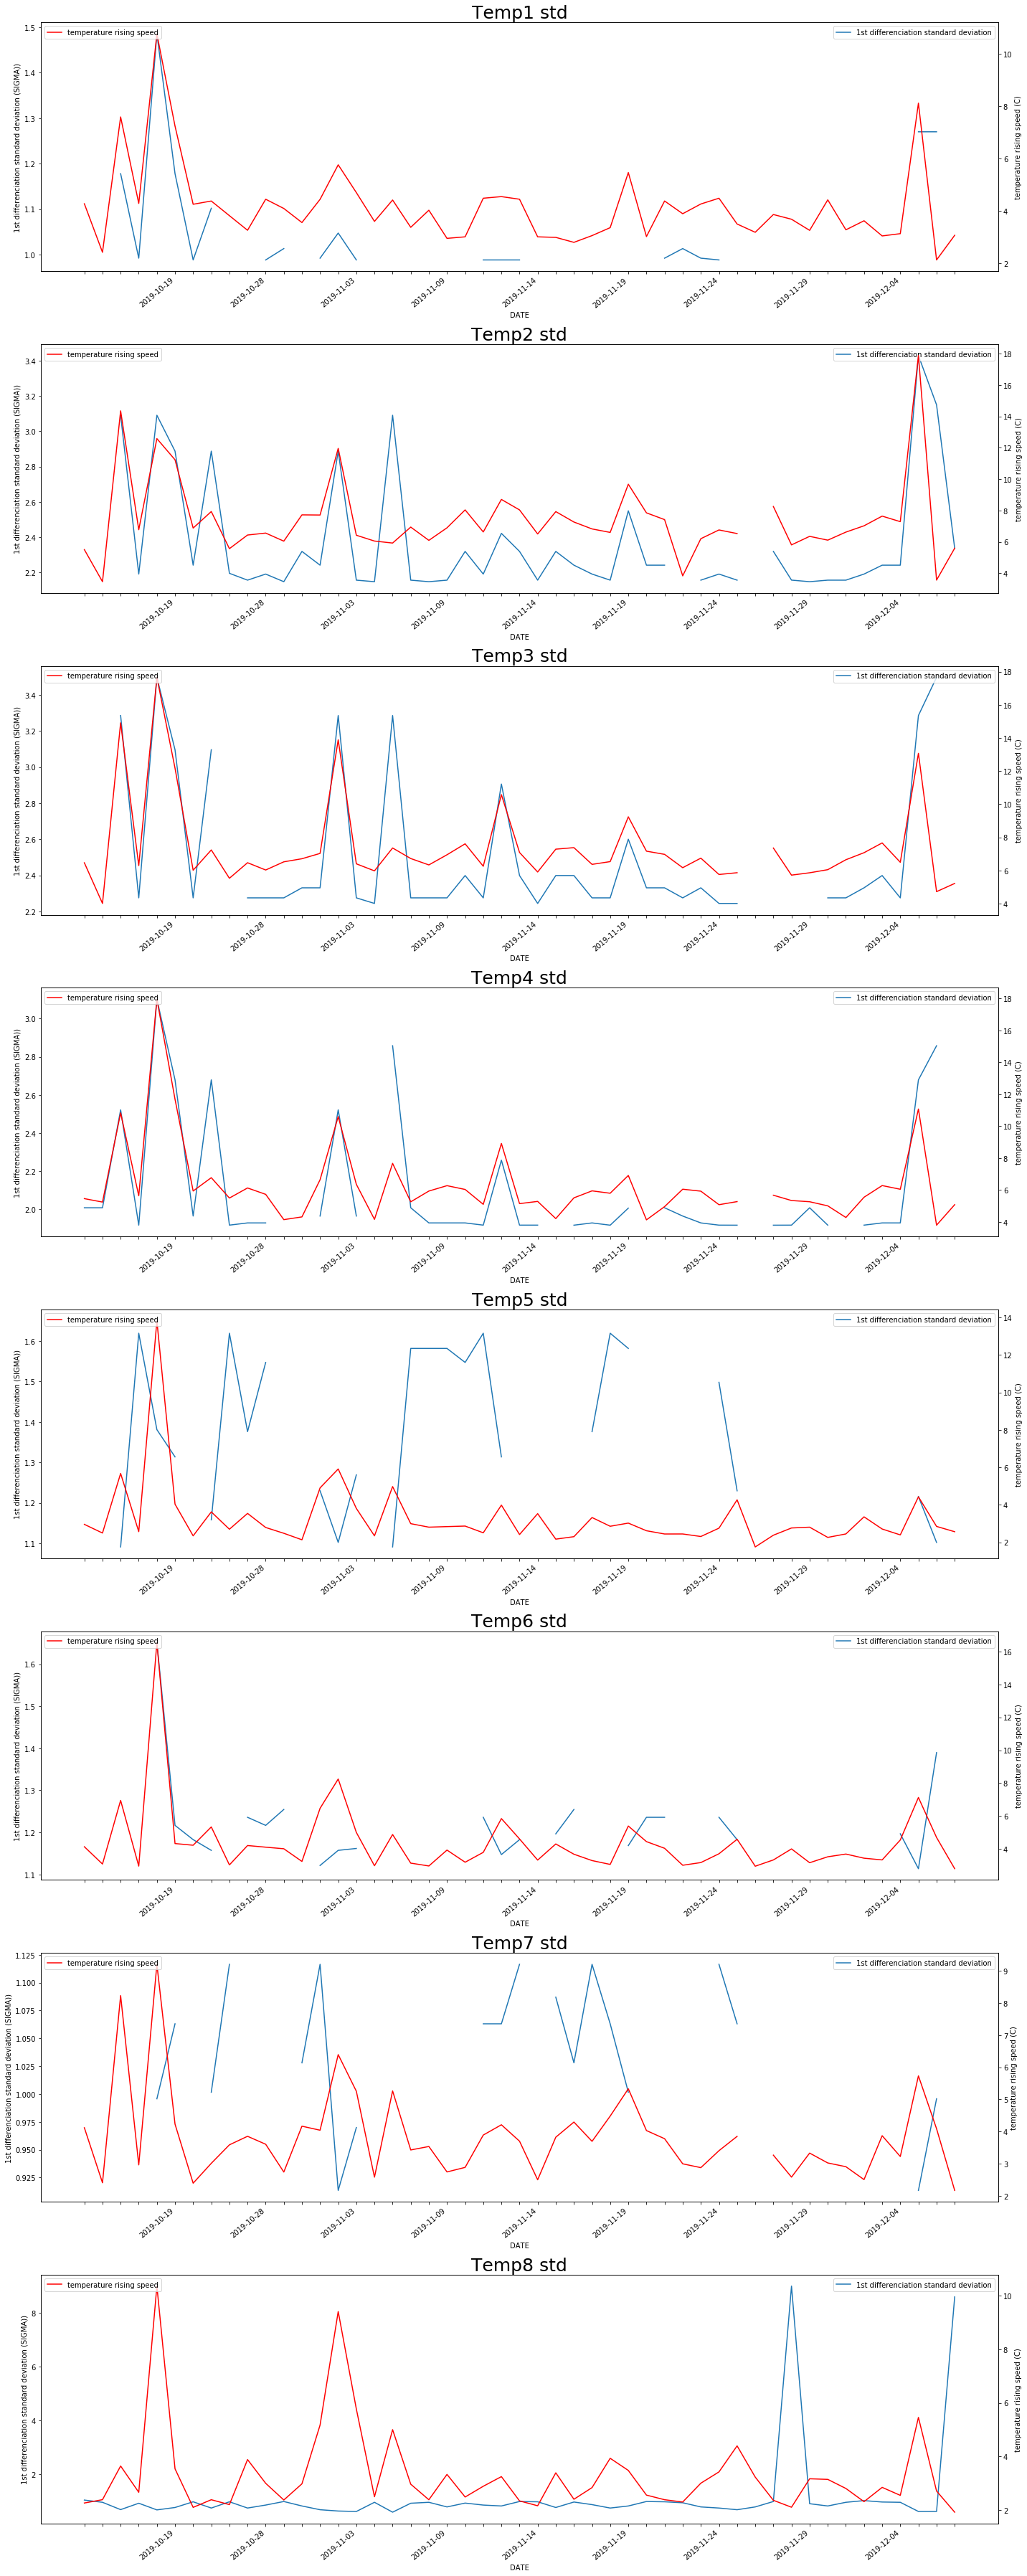

In [27]:
fig=plt.figure(figsize=(20,50))
for i,col in enumerate(df_rise_wave.columns[range(0,len(df_rise_wave.columns)-1,2)]):
    print(i,col)
    x=df_rise_wave.index
    ax=fig.add_subplot(8,1,i+1)
    ax.plot(x,df_rise_wave[col],label='1st differenciation standard deviation')
    ax1=ax.twinx()
    date=[]
    for k in range(0,len(x)-1,5):
        date=np.append(date,['','','','',x[k]])
    ax1.plot(x,df_rise_wave[df_rise_wave.columns[2*i+1]],color='r',label='temperature rising speed')
    ax.set_title(col,fontsize=25)
    ax.legend(loc=1)
    ax1.legend(loc=2)
    ax1.set_ylabel('temperature rising speed (C)')
    ax.set_ylabel('1st differenciation standard deviation (SIGMA))')
    ax.set_xlabel('DATE')
    ax.set_xticklabels(date, rotation=40)
fig.tight_layout()
          

### 將df_rise_wave丟到外部空間供其他執行檔存取

In [28]:
cdf=df_rise_wave
%store cdf

Stored 'cdf' (DataFrame)
